<a href="https://colab.research.google.com/github/alok98/neural-network/blob/master/imbd_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb

In [0]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

In [45]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [0]:
word_dict=imdb.get_word_index()

In [0]:
indx_dict=dict([(value,key) for (key,value) in word_dict.items()])


In [0]:
a=[indx_dict[i] for i in sorted(indx_dict.keys())]

In [0]:
sent_train=[' '.join([indx_dict.get(num-3,'?') for num in x_train[i]]) for i in range(len(x_train))]

In [52]:
sent_train[2]

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

In [0]:
import numpy as np

In [0]:
def vectorize(sentences, dim=10000):
  output=np.zeros((len(sentences),dim))
  for i,idx in enumerate(sentences):
    output[i,idx]=1
  return output

In [55]:
l=[[5,6],[7,8]]
for i,idx in enumerate(l):
  print(i,idx)

0 [5, 6]
1 [7, 8]


In [56]:

a=np.zeros(10)
a[[1,2,3]]=1
print(a)

[0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
X_train=vectorize(x_train)
X_test=vectorize(x_test)

In [58]:
Y_train=np.asarray(y_train).astype('float32')
Y_test=np.asarray(y_test).astype('float32')
print(Y_train)

[1. 0. 0. ... 0. 1. 0.]


In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense

In [0]:

model=Sequential()

In [0]:
model.add(Dense(units=16, activation='relu',input_dim=10000))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
x_val=X_train[:5000]
x_train_new=X_train[5000:]
y_val=Y_train[:5000]
y_train_new=Y_train[5000:]

In [77]:
hist=model.fit(x=x_train_new,y=y_train_new,batch_size=512,epochs=4,validation_data=(x_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 3s 138us/step - loss: 0.5169 - acc: 0.7896 - val_loss: 0.3463 - val_acc: 0.8710
Epoch 2/4
20000/20000 [==============================] - 2s 115us/step - loss: 0.2628 - acc: 0.9093 - val_loss: 0.2792 - val_acc: 0.8924
Epoch 3/4
20000/20000 [==============================] - 2s 113us/step - loss: 0.1889 - acc: 0.9368 - val_loss: 0.2760 - val_acc: 0.8904
Epoch 4/4
20000/20000 [==============================] - 2s 110us/step - loss: 0.1520 - acc: 0.9494 - val_loss: 0.2822 - val_acc: 0.8890


In [78]:
h=hist.history
h.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt

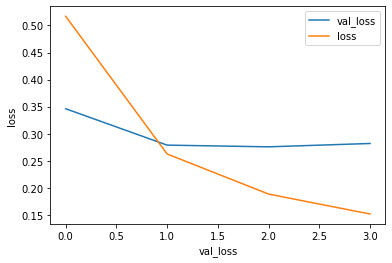

In [80]:
plt.plot(h['val_loss'],label='val_loss')
plt.plot(h['loss'],label='loss')
plt.xlabel('val_loss')
plt.ylabel('loss')
plt.legend()
plt.show()

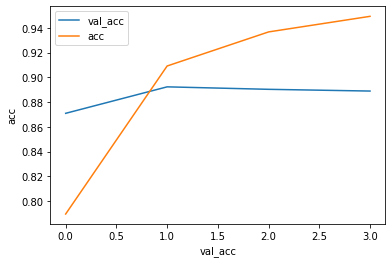

In [81]:
plt.plot(h['val_acc'],label='val_acc')
plt.plot(h['acc'],label='acc')
plt.xlabel('val_acc')
plt.ylabel('acc')
plt.legend()
plt.show()

In [84]:
model.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 2s 62us/step


0.87952